In [2]:
from matplotlib import pyplot as plt
import numpy
import pandas
from IPython.display import display

In [56]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
#adult_df = adult_df.set_index('Unnamed: 0')
adult_df.index = adult_df["Adult"]
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
#compas_df = compas_df.set_index('Unnamed: 0')
compas_df.index = compas_df["Compas"]
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
#bank_df = bank_df.set_index('Unnamed: 0')
bank_df.index = bank_df["Bank"]
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")
#german_df = german_df.set_index('Unnamed: 0')
german_df.index = german_df["German"]

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = abs(df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"])
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    

In [4]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [39]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression', 'Meta Classifier']
['RW', 'DIR', 'EGR', 'GSR', 'MFC', 'PR', 'CEOP', 'ROC', 'EOP']
['RW + EGR', 'RW + GSR', 'RW + MFC', 'RW + PR', 'RW + CEOP', 'RW + ROC', 'RW + EOP', 'DIR + EGR', 'DIR + GSR', 'DIR + MFC', 'DIR + PR', 'DIR + CEOP', 'DIR + ROC', 'DIR + EOP', 'EGR + CEOP', 'EGR + ROC', 'EGR + EOP', 'GSR + CEOP', 'GSR + ROC', 'GSR + EOP', 'MFC + CEOP', 'MFC + ROC', 'MFC + EOP', 'PR + CEOP', 'PR + ROC', 'PR + EOP']
['RW + EGR + CEOP', 'RW + EGR + ROC', 'RW + EGR + EOP', 'RW + GSR + CEOP', 'RW + GSR + ROC', 'RW + GSR + EOP', 'RW + MFC + CEOP', 'RW + MFC + ROC', 'RW + MFC + EOP', 'RW + PR + CEOP', 'RW + PR + ROC', 'RW + PR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC', 'DIR + EGR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC', 'DIR + GSR + EOP', 'DIR + MFC + CEOP', 'DIR + MFC + ROC', 'DIR + MFC + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC', 'DIR + PR + EOP']


Unnamed: 0
RW      0.6260
DIR     0.6404
EGR     0.5666
GSR     0.5901
MFC     0.5823
PR      0.5862
CEOP    0.5767
ROC     0.6170
EOP     0.5660
Name: F1 Score, dtype: float64

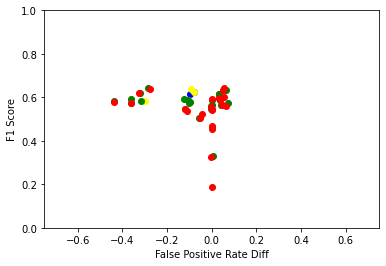

In [26]:
display(adult_df['F1 Score'][one_int])
x1 = adult_df["False Positive Rate Diff"][no_int]
y1 = adult_df["F1 Score"][no_int]
plt.scatter(x1, y1, c ="blue")

x2 = adult_df["False Positive Rate Diff"][one_int]
y2 = adult_df["F1 Score"][one_int]
plt.scatter(x2, y2, c ="yellow")

x3 = adult_df["False Positive Rate Diff"][two_int]
y3 = adult_df["F1 Score"][two_int]
plt.scatter(x3, y3, c ="green")

x4 = adult_df["False Positive Rate Diff"][three_int]
y4 = adult_df["F1 Score"][three_int]
plt.scatter(x4, y4, c ="red")

plt.xlabel("False Positive Rate Diff")
plt.ylabel("F1 Score")
plt.xlim(-0.75, 0.75)
plt.ylim(0, 1)
plt.show()

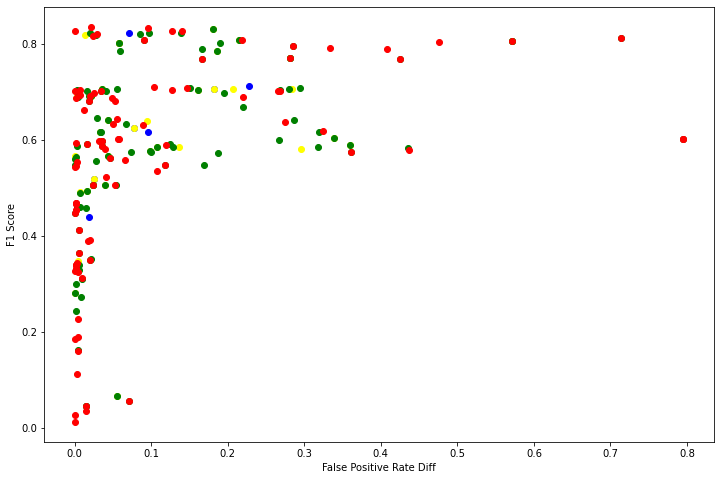

In [62]:
def display_scatter(x, y):
    plt.figure(figsize=(12, 8))
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x1 = df.reindex(columns=[x], index=no_int)
        y1 = df.reindex(columns=[y], index=no_int)
        plt.scatter(x1, y1, c ="blue", )
    
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x2 = df.reindex(columns=[x], index=one_int)
        y2 = df.reindex(columns=[y], index=one_int)
        plt.scatter(x2, y2, c ="yellow", )

    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x3 = df.reindex(columns=[x], index=two_int)
        y3 = df.reindex(columns=[y], index=two_int)
        plt.scatter(x3, y3, c ="green", )
    
    for df, marker in zip([adult_df, compas_df, bank_df, german_df], ["," , "o" , "v" , "^"]):
        x4 = df.reindex(columns=[x], index=three_int)
        y4 = df.reindex(columns=[y], index=three_int)
        plt.scatter(x4, y4, c ="red", )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
display_scatter("False Positive Rate Diff", "F1 Score")
#display_scatter("Accuracy", "F1 Score")
